# K MEANS EJ

In [ ]:
### Ejercicio 1 
### Cargue el archivo txt separado por tabs llamado "Data kmeans.txt" en excel. Con dicha data utilice el 
### algoritmo de Kmeans para clusterizar la data. Tome en cuenta que debe utilizar 2 iteraciones, 3 clusters (o Ks),
### debe normalizar la data y los centroides deben comenzar en las siguientes posiciones normalizadas 
### K1=(0.3,0.4) K2=(0.7,0.6) y K3 =(0.5,0.5). Luego de realizar las 2 iteraciones grafique su ultima iteracion 
### conteste la siguiente pregunta: Que dos cosas puedo hacer para mejorar mi clustering?


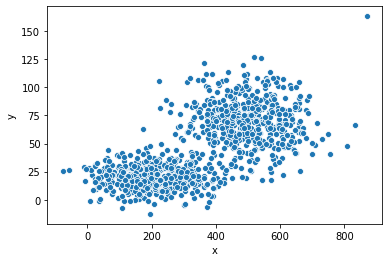

In [127]:
### Ejercicio 2
### Cargue el archivo llamado "Data kmeans 2.txt", nombrelo como "data".
### Grafique la tabla resultante en dos ejes (variable x en eje x y variable y en eje y
### Responda las siguientes pregutnas: ??Nota algo raro? ??Que puede hacer para resolver el problema
### visto en la grafica?
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

data=pd.read_csv('/Users/jorgebohl/Desktop/Martinexsa/Proyectos/Cursos/Bantrab/Data/Data kmeans 2.txt',sep="\t")


sns.scatterplot(x=data["x"],y=data["y"])

In [133]:
data

x           y    x_norm    y_norm
0    259.943724    6.308735  0.370335  0.135566
1    147.985535   20.888448  0.247392  0.239840
2    123.530171   28.321189  0.220537  0.292999
3    138.374127   23.854982  0.236837  0.261057
4     77.983887   19.915330  0.170521  0.232880
..          ...         ...       ...       ...
994  688.765590   92.652297  0.841233  0.753097
995  646.728967   82.597027  0.795072  0.681182
996  393.161204   87.229484  0.516624  0.714313
997  325.283560   39.087078  0.442086  0.369997
998  658.727213  104.992564  0.808247  0.841355

[999 rows x 4 columns]

In [129]:
data = data[(data["y"]>=150)==False]

In [131]:
### Ejercicio 3
### Luego de resolver el problema del ejercicio 2, c
### normalize las columnas para que sus rangos sean comparables, 
### grafique su tabla normalizada, y obtenga con este paquete la grafica de wss.
### En base a la grafica anterior cuales son los 3 elbows posibles?, haga su modelo de kmeans 
### utilizando los 3 Ks sugeridos por la grafica y guardelo como "modelokx", "modeloky" y "modelokz". 
### A los 3 modelos imprima los valores de los centroides finales, a que cluster pertenece cada dato y 
### la cantidad de puntos que caen en cada cluster


#Para normalizar
data["x_norm"]=(data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y_norm"]=(data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

/Users/jorgebohl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/jorgebohl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


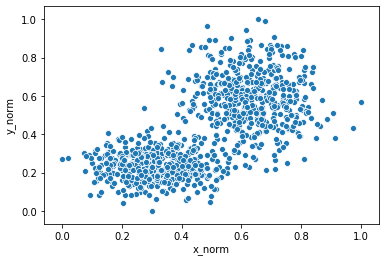

In [132]:
sns.scatterplot(x=data["x_norm"],y=data["y_norm"])

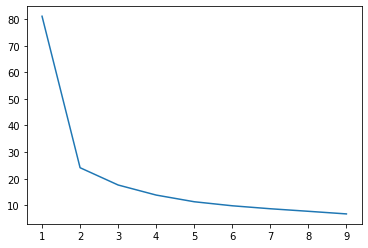

In [136]:
wss=[]
clust=[]

for i in range(1,10):
    within=KMeans(n_clusters=i).fit(data[["x_norm","y_norm"]])
    clust.append(i)
    wss.append(within.inertia_)
    
sns.lineplot(x=clust,y=wss)

#Ks sugeriods 2,4,6 

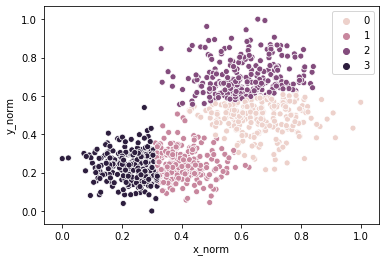

In [143]:
from sklearn.cluster import KMeans
modelokx = KMeans(n_clusters=2).fit(data[["x_norm","y_norm"]])
modeloky = KMeans(n_clusters=4).fit(data[["x_norm","y_norm"]])
modelokz = KMeans(n_clusters=6).fit(data[["x_norm","y_norm"]])

clusters = modeloky.fit_predict(data[["x_norm","y_norm"]])
sns.scatterplot(data['x_norm'], data['y_norm'], hue=clusters)

In [140]:
#Centroides
print('modelkx:',modelokx.cluster_centers_)
print('modelky:',modeloky.cluster_centers_)
print('modelkz:',modelokz.cluster_centers_)

modelkx: [[0.63036089 0.59441864]
 [0.31320014 0.23713   ]]
modelky: [[0.40601212 0.2449904 ]
 [0.60593774 0.70031782]
 [0.22758397 0.23273407]
 [0.65914928 0.4801578 ]]
modelkz: [[0.22469365 0.23311868]
 [0.6168393  0.78346093]
 [0.64872634 0.41070697]
 [0.39719305 0.23765137]
 [0.74392896 0.59236337]
 [0.53207812 0.58627793]]


In [144]:
#Observaciones en cada cluster modelokx
pd.Series(modelokx.labels_).value_counts()

1    513
0    486
dtype: int64

In [145]:
#Observaciones en cada cluster modelokx
pd.Series(modeloky.labels_).value_counts()

3    271
2    248
1    242
0    238
dtype: int64

In [146]:
#Observaciones en cada cluster modelokz
pd.Series(modelokz.labels_).value_counts()

4    259
1    241
3    155
2    134
5    123
0     87
dtype: int64

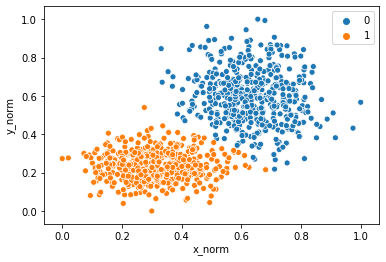

In [147]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modelokx.labels_)

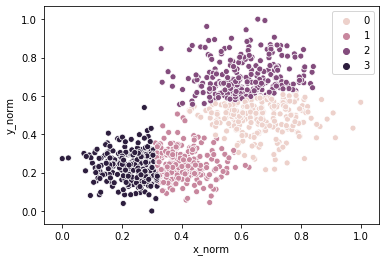

In [148]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modeloky.labels_)

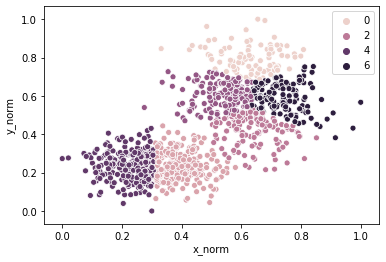

In [149]:
sns.scatterplot(data['x_norm'], data['y_norm'], hue=modelokz.labels_)

In [ ]:

### Ejercicio 4
### Utilizando el set de datos iris, entrene un modelo de K-Means
### Utilice un k de 3
### Luego utilizando la 
### funcion pairplot de seaborn grafique los clusters utilizando una grafica de dos dimensiones tomando
### en cuenta todas las variables del modelo.


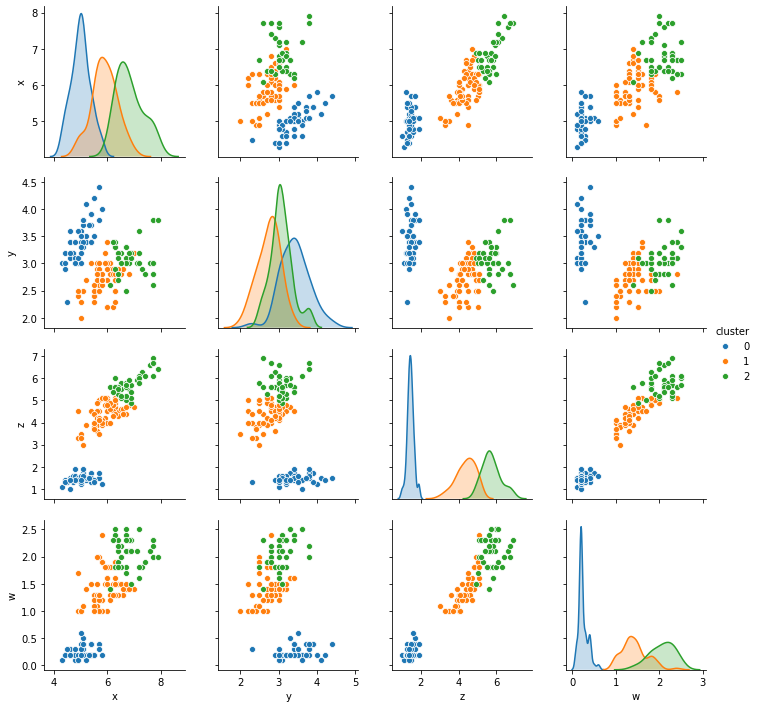

In [126]:

iris = sklearn.datasets.load_iris()


modeloIris = KMeans(n_clusters=3).fit(pd.DataFrame(iris.data))
clusters = pd.Series(modeloIris.fit_predict(pd.DataFrame(iris.data)))
iris_final=pd.concat([pd.DataFrame(iris.data),clusters],axis=1)
iris_final.columns=["x","y","z","w","cluster"]

sns.pairplot(data=iris_final,vars=['x', 'y', 'z', 'w'],hue="cluster")